# AI Powered Game

Esta práctica es una adaptación del contenido del curso:

https://learn.deeplearning.ai/courses/building-an-ai-powered-game/lesson/1/introduction


usando langchain y llama 3.2


**Con esta práctica aprenderás:**

- Dar la estructura deseada a la respuesta del modelo
- Guardar la información para su uso posterior


## Creating a Pirate World

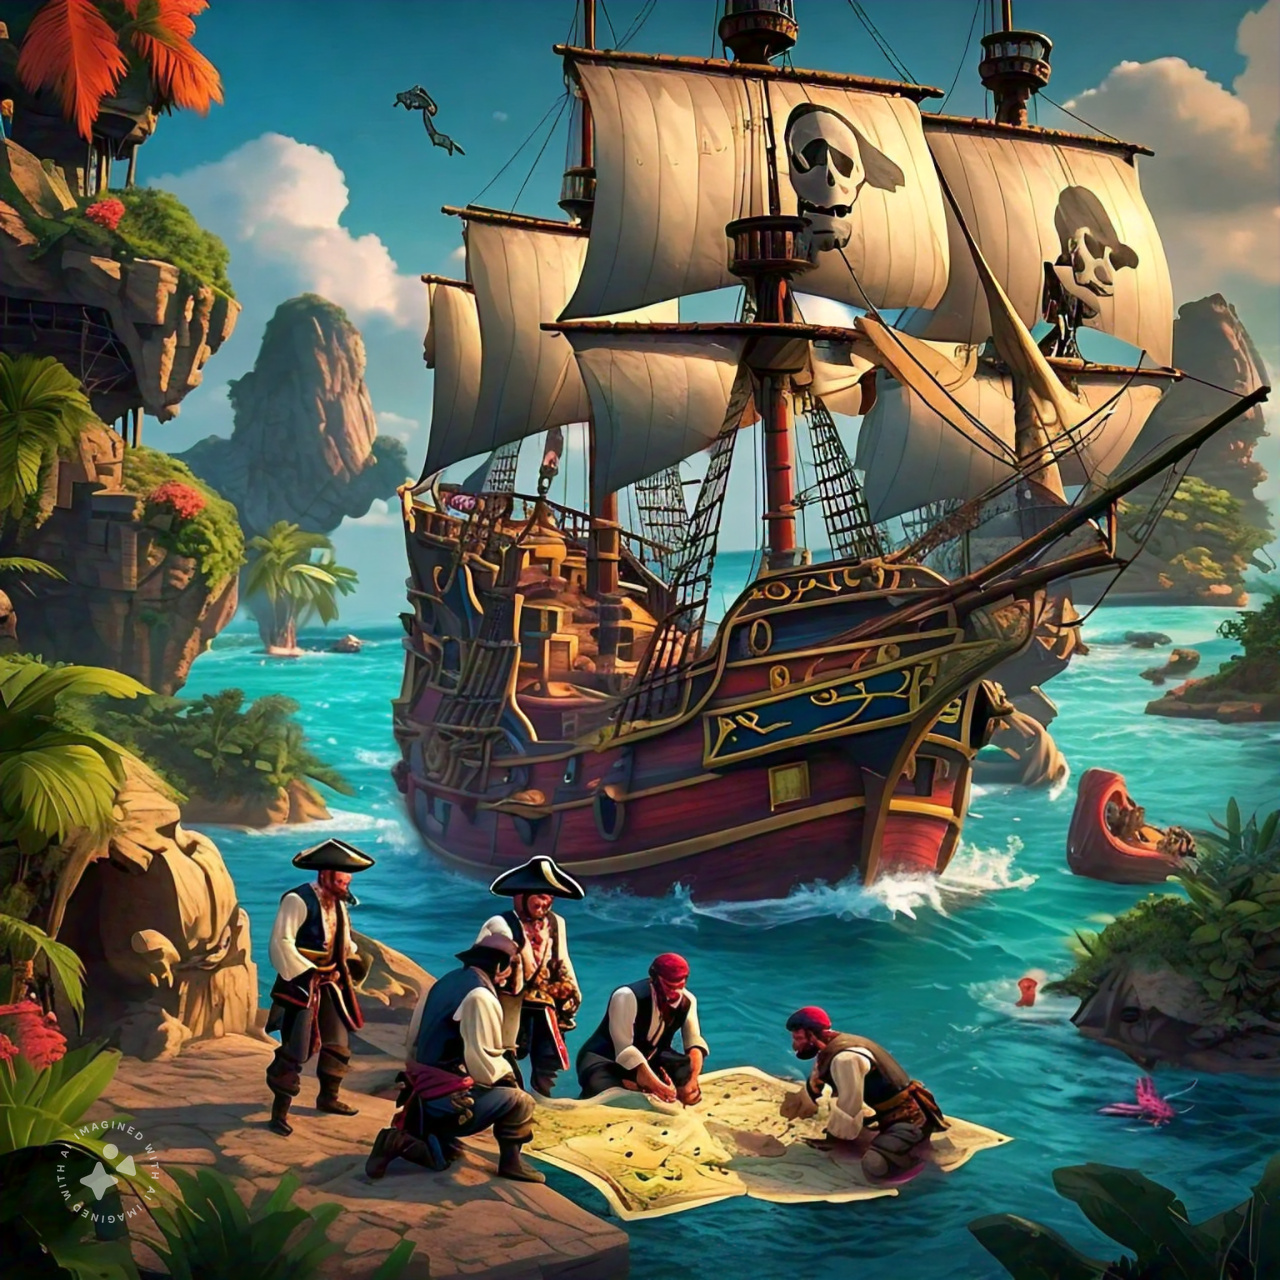

In [ ]:
 # install this version: pip install langchain_ollama 'ollama<0.4.0'

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

In [ ]:
class World(BaseModel):
    WorldName: str = Field(description="name of the world")
    WorldDesc: str = Field(description="description of the world")


In [ ]:
world_prompt = f"""
Generate a creative description for a unique fantasy world with an
interesting concept around pirates, ships, sea and treasures. Create a world, giving it a name and a description. Write in spanish always.

"""

In [ ]:
local_llm = 'llama3.2'
llm = ChatOllama(model=local_llm, temperature=1)
parser = JsonOutputParser(pydantic_object=World)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | llm | parser

result_world=chain.invoke({"query": world_prompt})

In [ ]:
result_world['properties']['TerraMarea']['description']

'un mundo de maravillas y peligros en el vasto océano azul'

In [ ]:
world = {
    "name": result_world['properties']['TerraMarea']['title'],
    "description": result_world['properties']['TerraMarea']['description']
}

In [ ]:
island_prompt = f"""
Create three islands in a fantasy pirates world, giving them a name and a description.
"""

In [ ]:
class Island(BaseModel):
    IslandName: str = Field(description="name of the island")
    IslandDesc: str = Field(description="description of the island")


In [ ]:
parser2 = JsonOutputParser(pydantic_object=Island)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser2.get_format_instructions()},
)

chain = prompt | llm | parser

result_island=chain.invoke({"query": island_prompt})

In [ ]:
islands = {}
for i in range(3):
    name = result_island['properties']['IslandName'][i]
    desc = result_island['properties']['IslandDesc'][i]
    island = {
      "name": name,
      "description": desc,
      "world": world['name']
    }
    islands[name] = island
world['islands']=islands


In [ ]:
town_prompt = f"""
Create three towns for a fantasy pirate world named {world['name']}.
"""

In [ ]:
class Town(BaseModel):
    TownName: str = Field(description="name of the town")
    TownDesc: str = Field(description="description of the town")


In [ ]:
parser3 = JsonOutputParser(pydantic_object=Town)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser3.get_format_instructions()},
    )

chain = prompt | llm | parser
result_town=chain.invoke({"query": town_prompt})


In [ ]:
result_town

[{'properties': {'TownName': {'title': 'Isle Royale',
    'description': 'a kingdom of pirates and treasure hunters',
    'type': 'string'},
   'TownDesc': {'title': 'Royal Isle',
    'description': 'the home to the Pirate King',
    'type': 'string'}},
  'required': ['TownName', 'TownDesc']},
 {'properties': {'TownName': {'title': 'Village of Corsairs',
    'description': 'a free city, ruled by its own pirate council',
    'type': 'string'},
   'TownDesc': {'title': "Corsair's Haven",
    'description': 'the place where pirates set sail from',
    'type': 'string'}},
  'required': ['TownName', 'TownDesc']},
 {'properties': {'TownName': {'title': 'Hidden Cove',
    'description': 'a small island village',
    'type': 'string'},
   'TownDesc': {'title': 'Cove of Dreams',
    'description': 'the place where pirates find solace and peace',
    'type': 'string'}},
  'required': ['TownName', 'TownDesc']}]

## Save the World


In [ ]:
import json

def save_world(world, filename):
    with open(filename, 'w') as f:
        json.dump(world, f)

def load_world(filename):
    with open(filename, 'r') as f:
        return json.load(f)

save_world(result_world, 'PirateWorld.json')